# Analysis of Basic LGBM Model Training

## Trained with like_count as target

### Trained on image posts

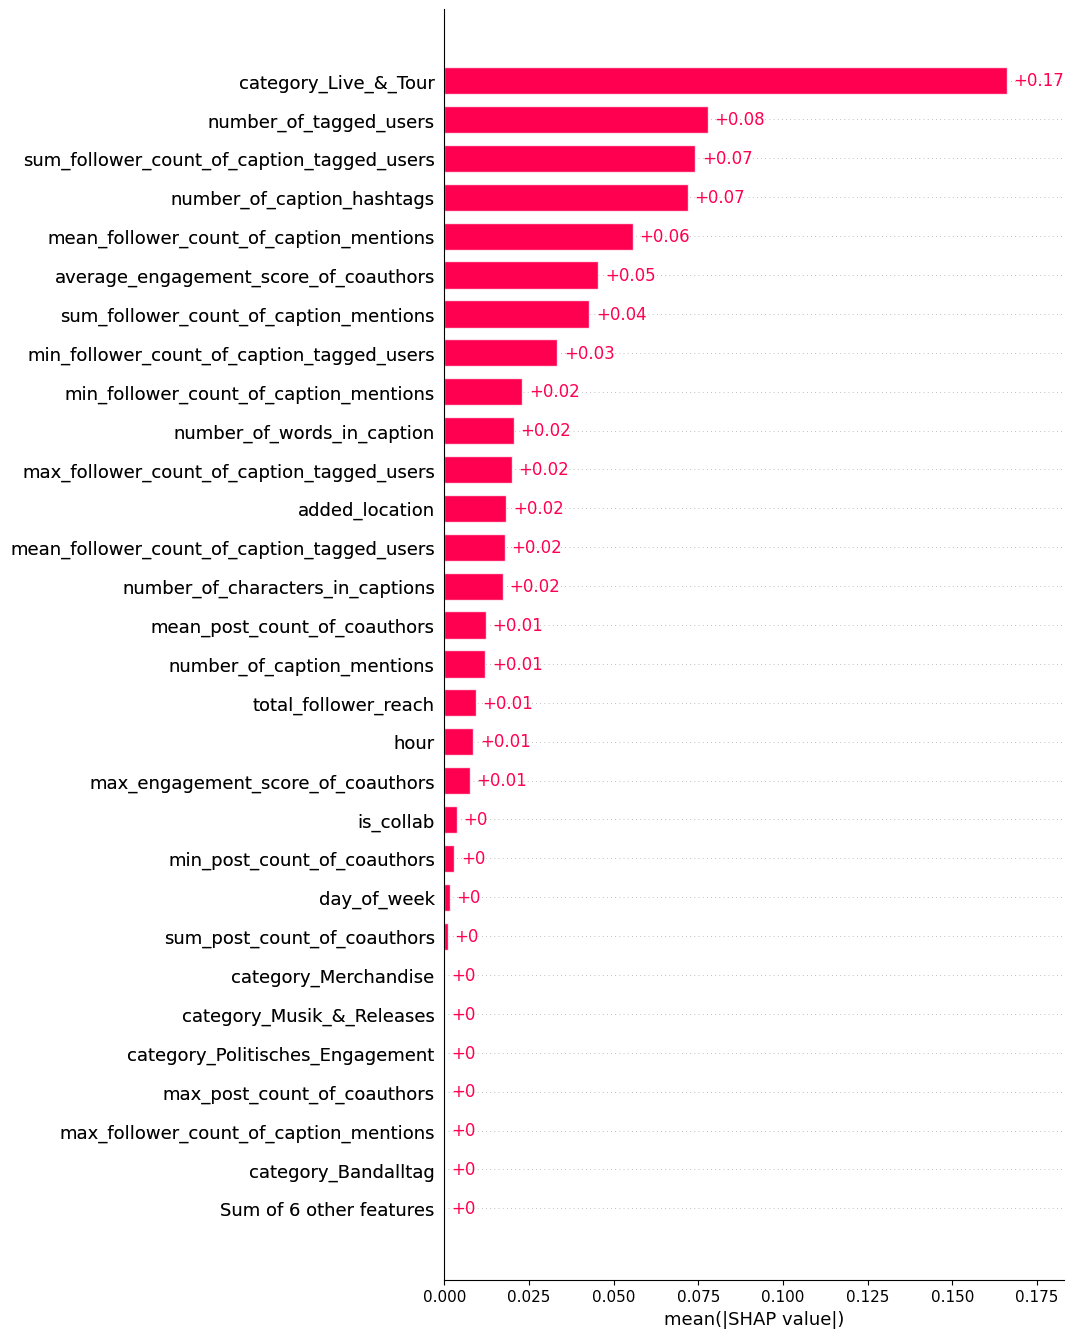

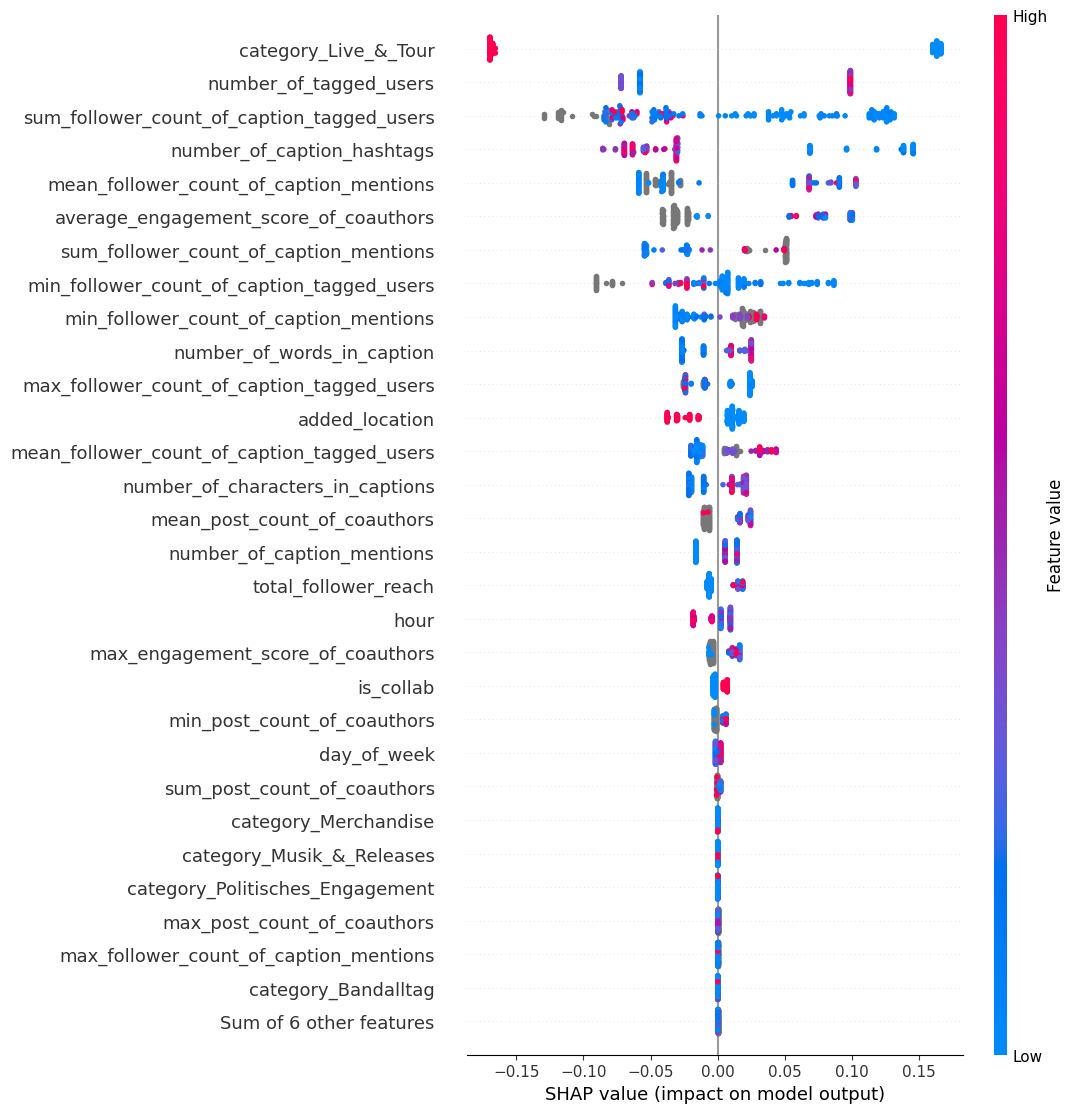

In [1]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_image_df_results_like_count = load_results("insta_analytics_notebooks/model_training/dorfterror_image_df_results_like_count")
shap_image_df = basic_shap_explainer(dorfterror_image_df_results_like_count)

shap.plots.bar(shap_image_df, max_display=30)
shap.plots.beeswarm(shap_image_df, max_display=30)


### Trained on carousel posts

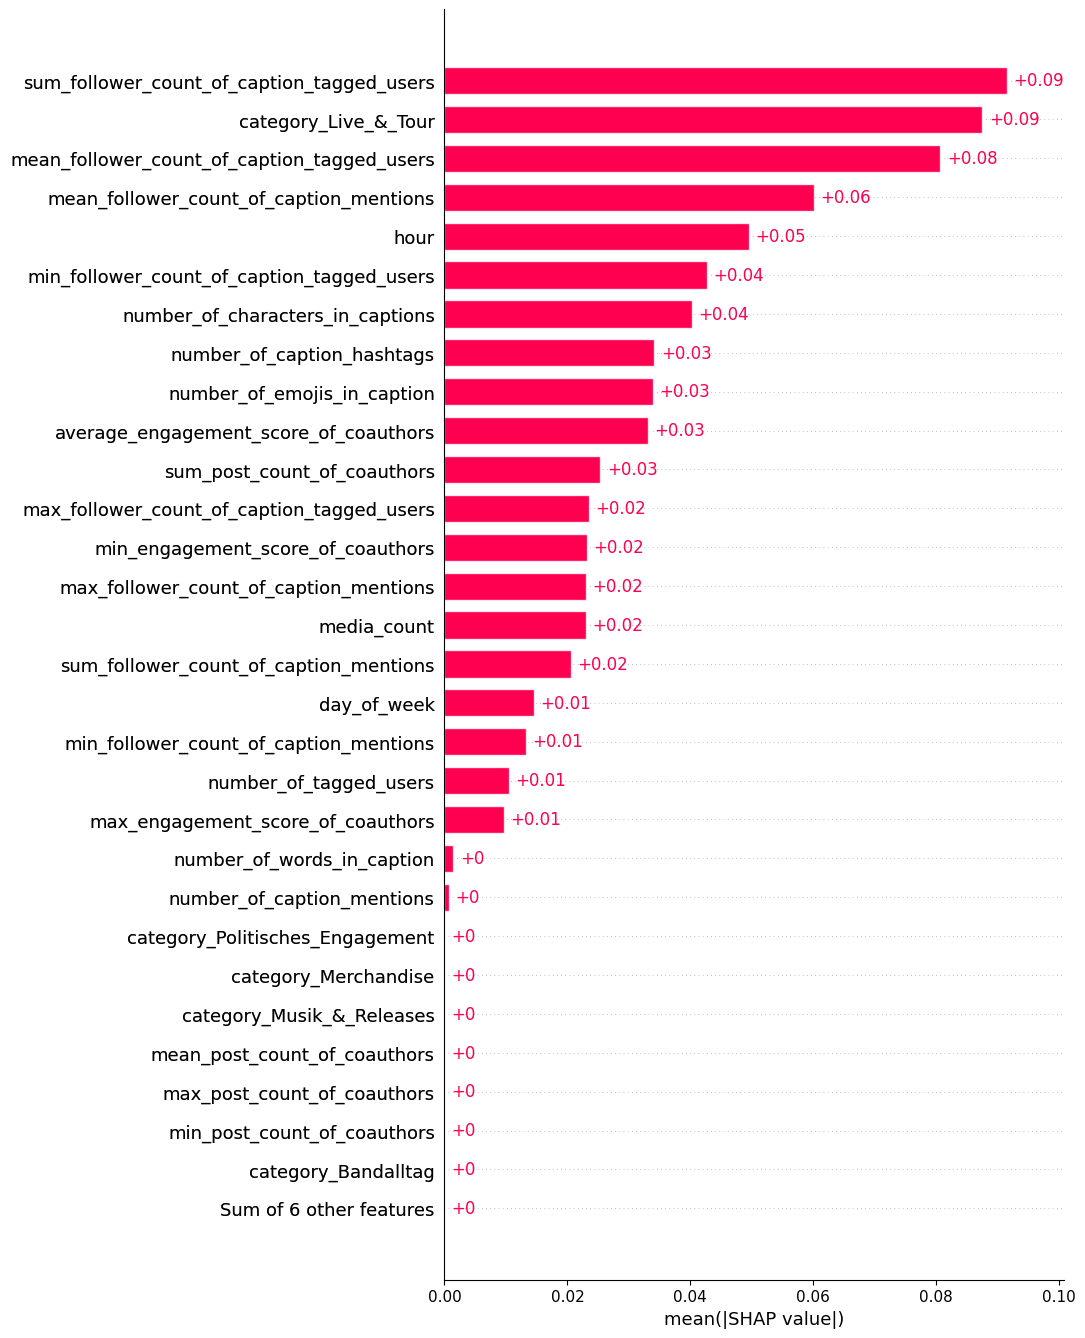

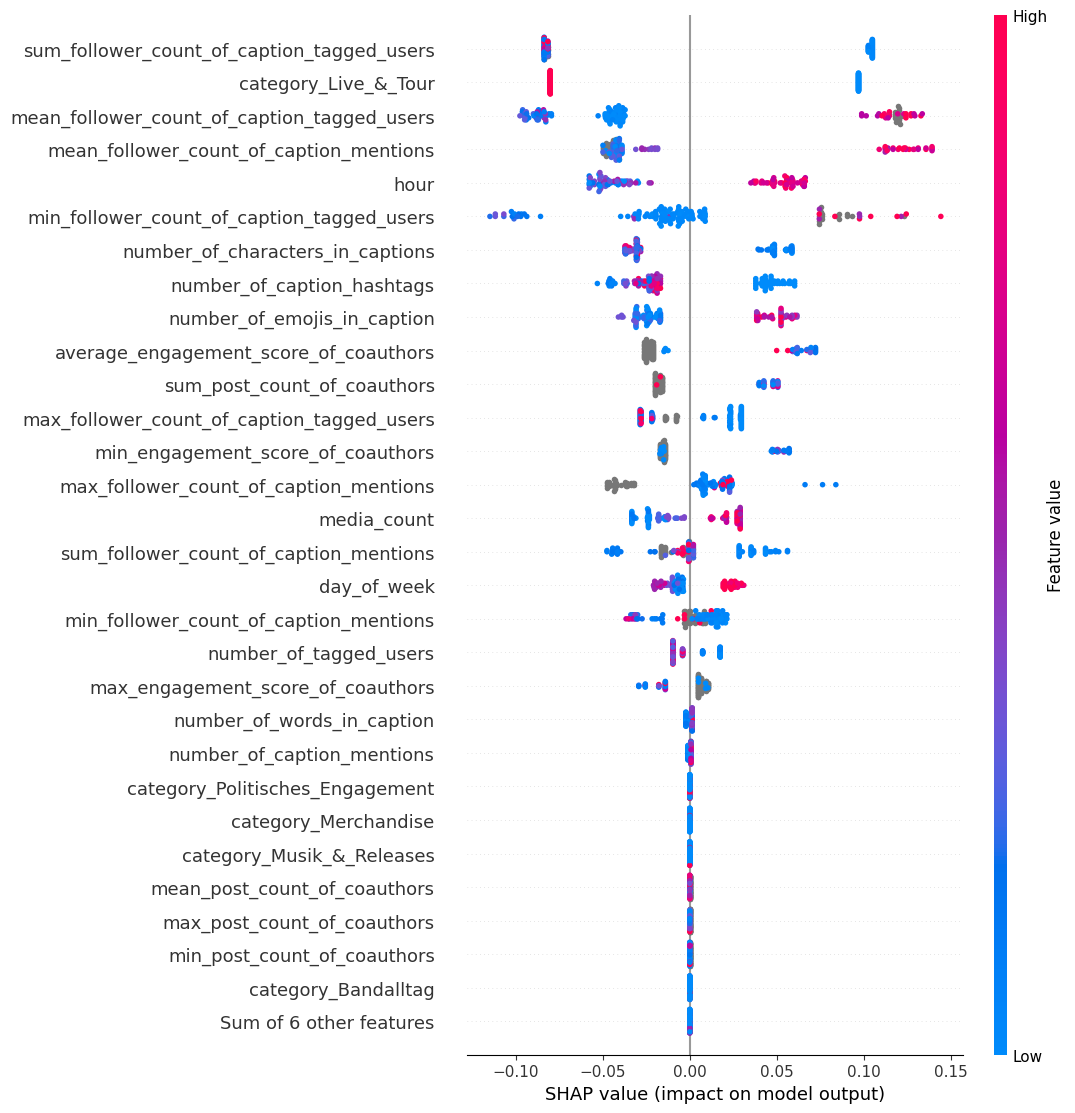

In [2]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_carousel_df_results_like_count = load_results("insta_analytics_notebooks/model_training/dorfterror_carousel_df_results_like_count")
shap_carousel_df = basic_shap_explainer(dorfterror_carousel_df_results_like_count)

shap.plots.bar(shap_carousel_df, max_display=30)
shap.plots.beeswarm(shap_carousel_df, max_display=30)


### Trained on video posts

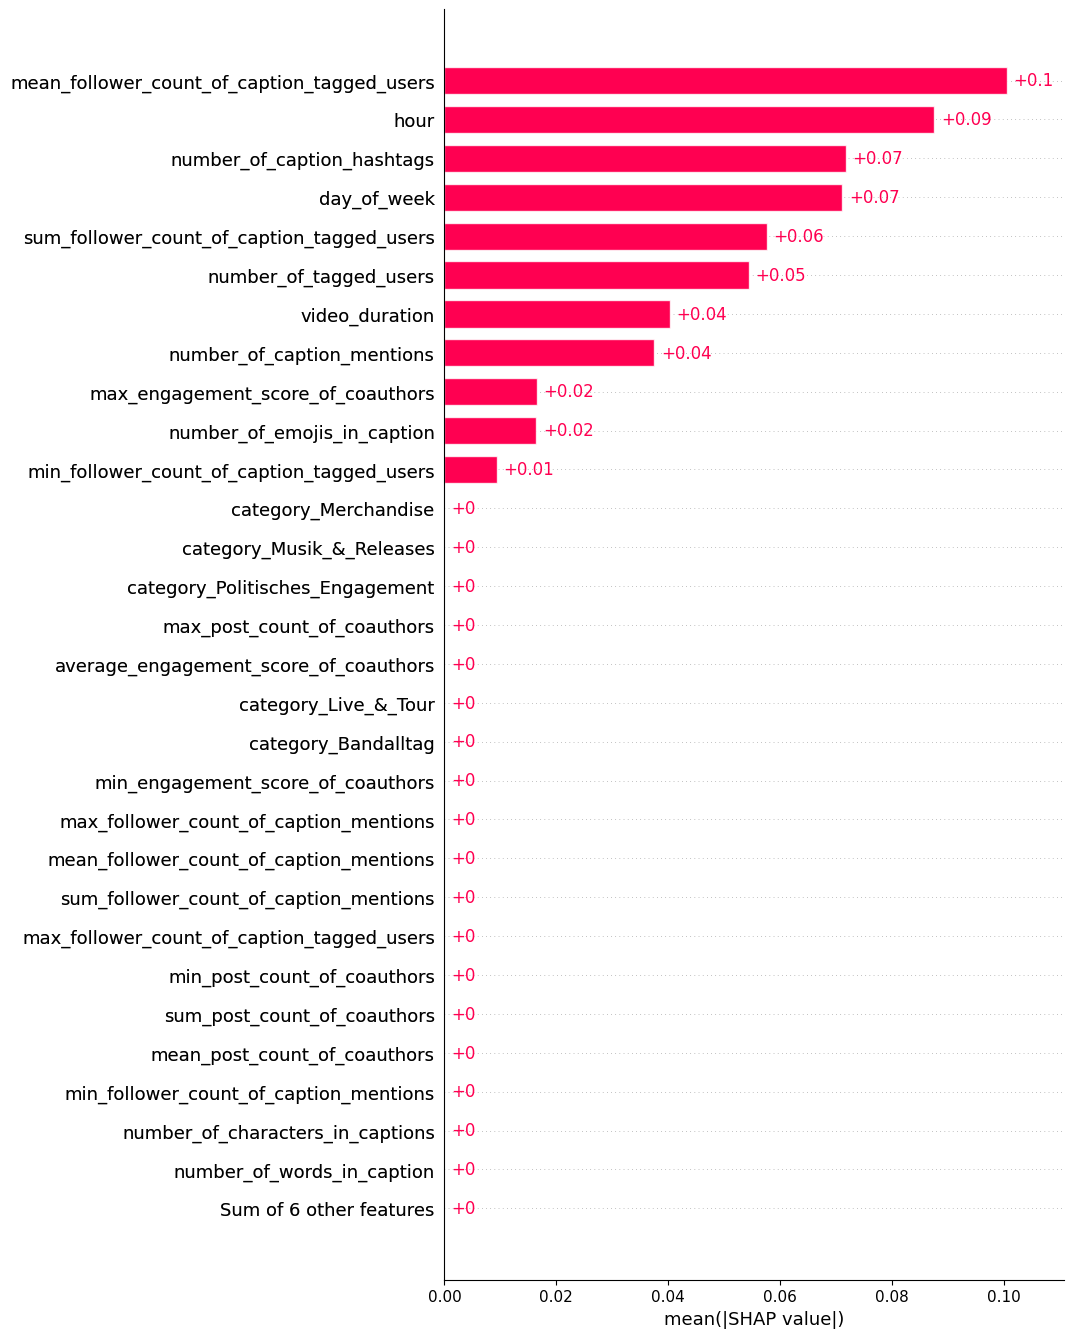

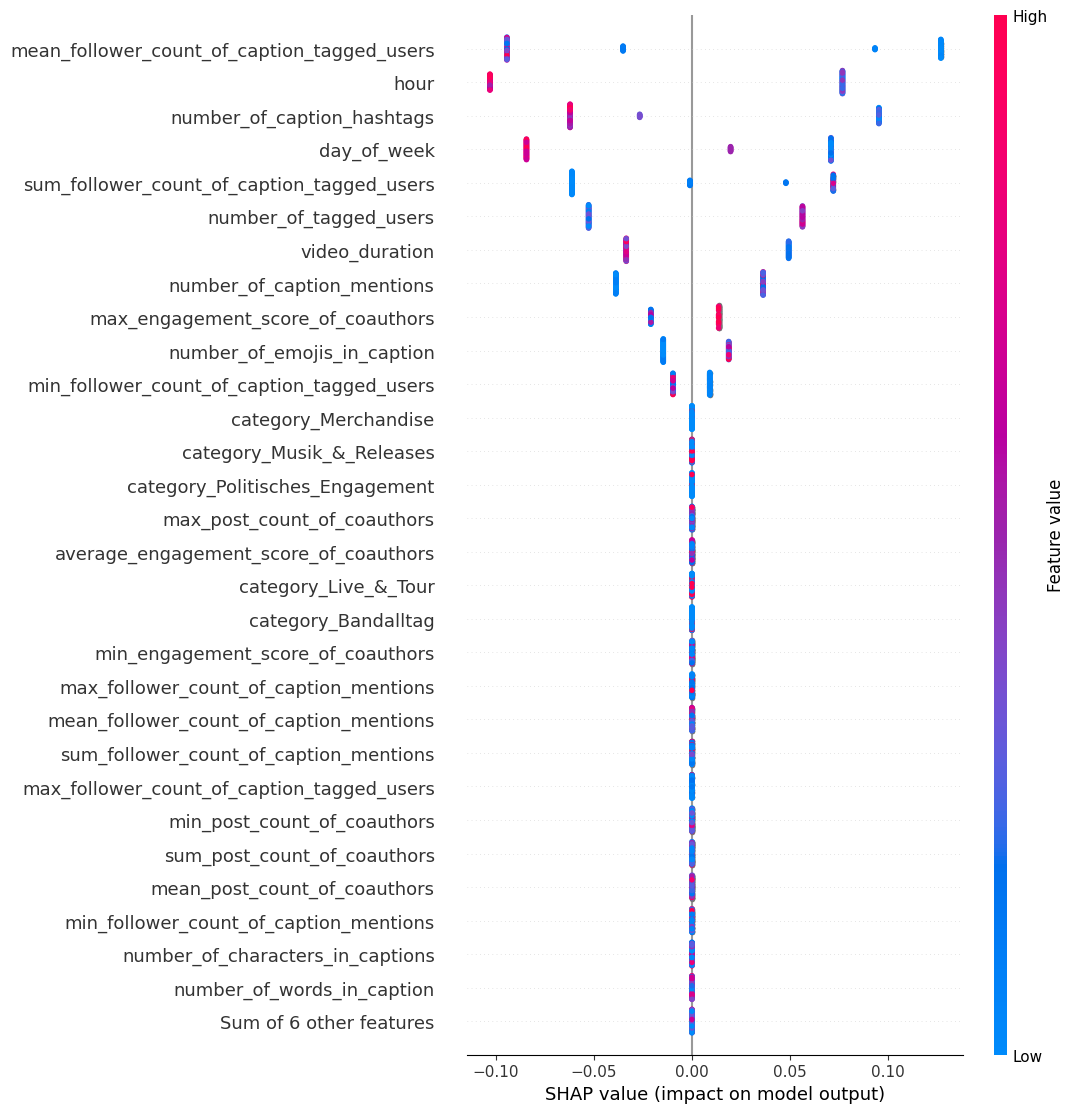

In [3]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_video_df_results_like_count = load_results("insta_analytics_notebooks/model_training/dorfterror_video_df_results_like_count")
shap_video_df = basic_shap_explainer(dorfterror_video_df_results_like_count)

shap.plots.bar(shap_video_df, max_display=30)
shap.plots.beeswarm(shap_video_df, max_display=30)


### Trained on all posts

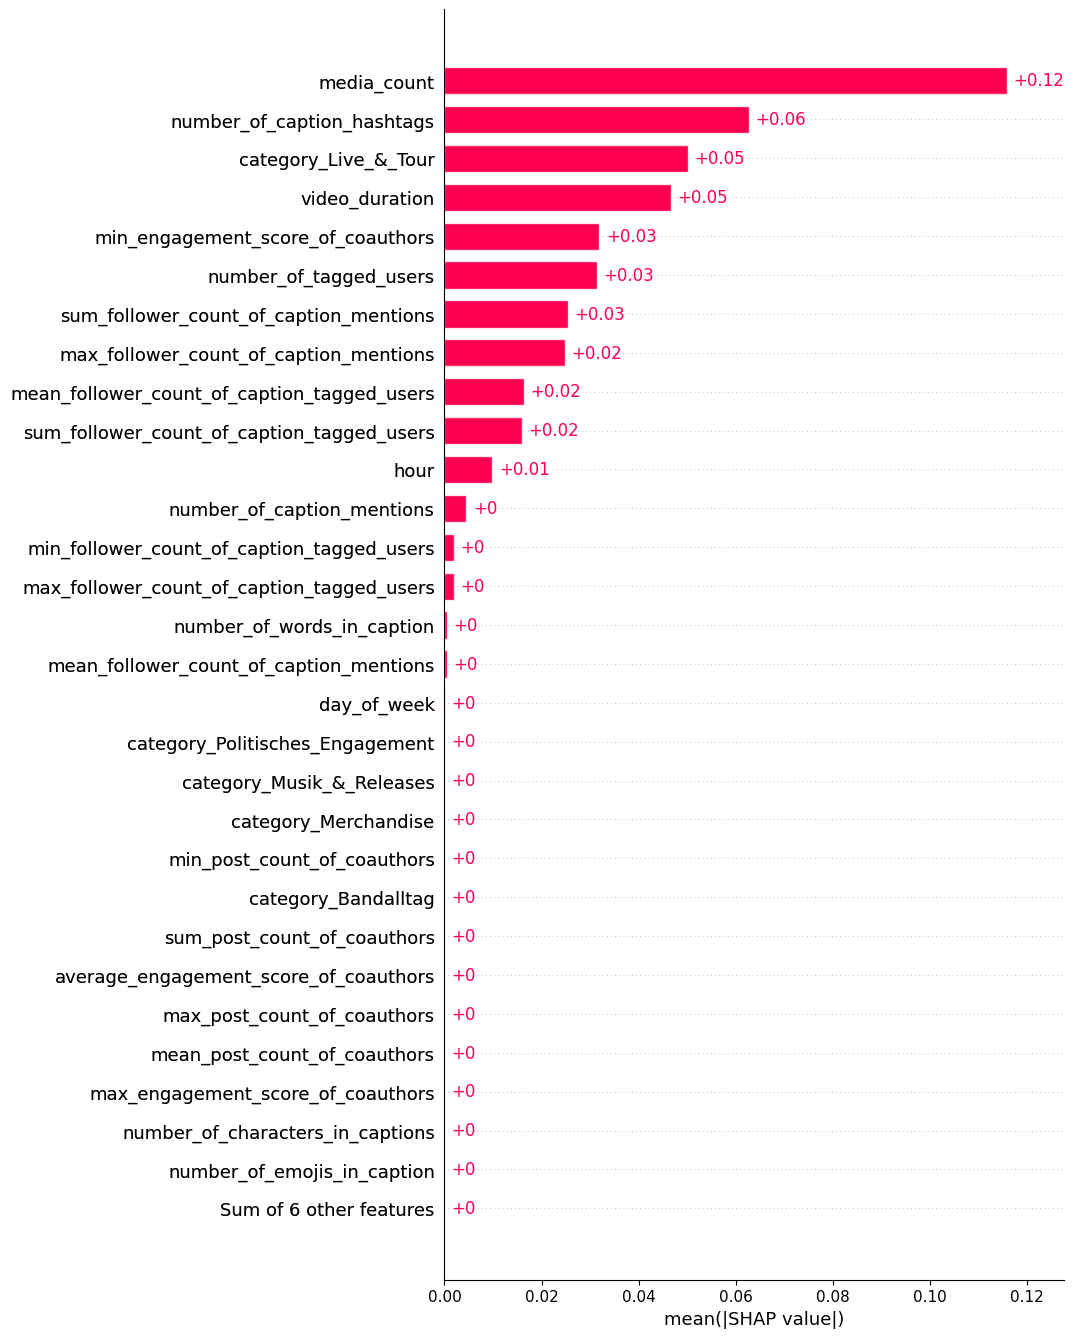

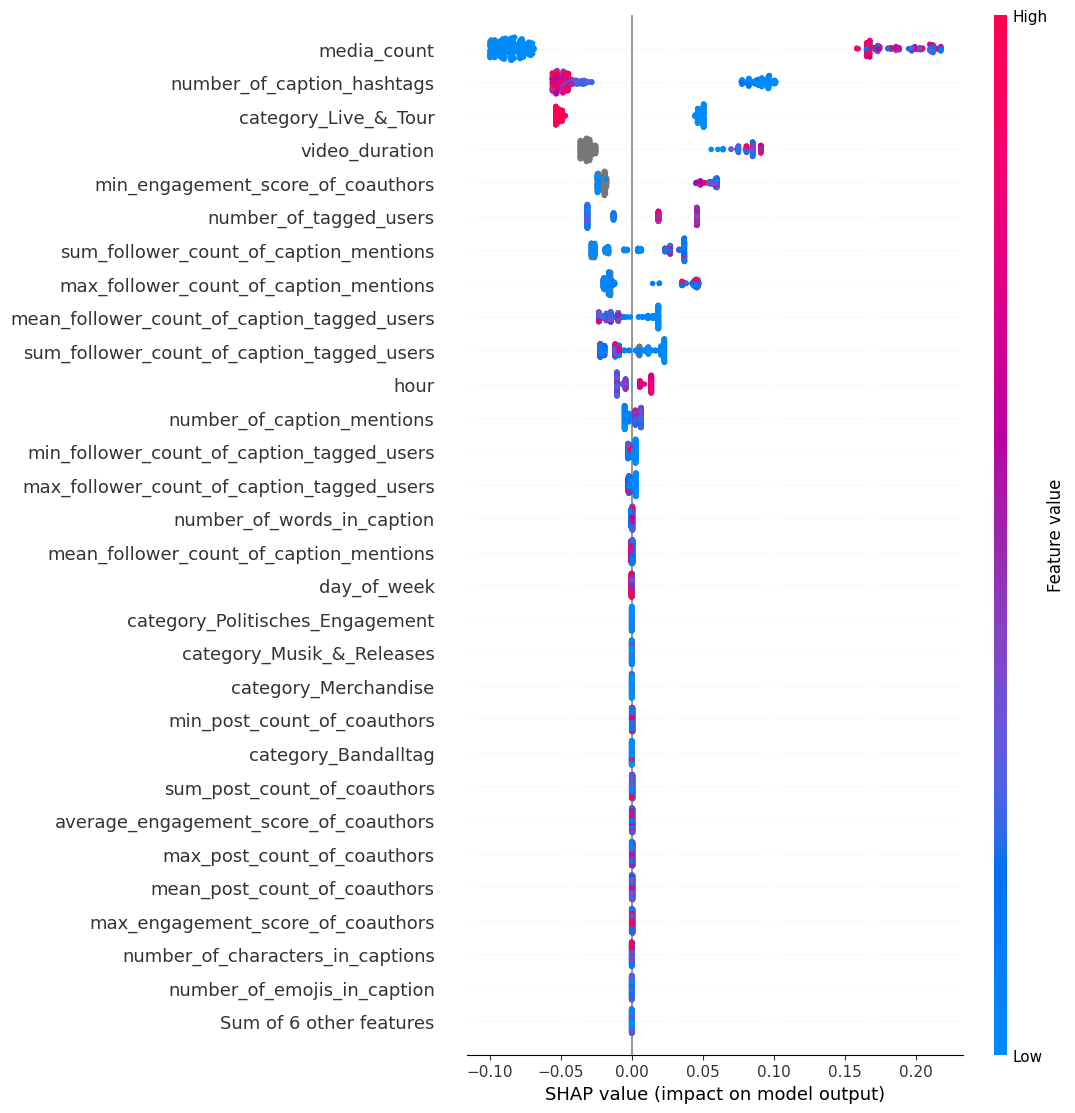

In [4]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_whole_dataset_df_results_like_count = load_results("insta_analytics_notebooks/model_training/dorfterror_whole_dataset_df_results_like_count")
shap_whole_dataset_df = basic_shap_explainer(dorfterror_whole_dataset_df_results_like_count)

shap.plots.bar(shap_whole_dataset_df, max_display=30)
shap.plots.beeswarm(shap_whole_dataset_df, max_display=30)


### Comparison

In [5]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def get_mean_abs_shap(shap_values, feature_names):
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    return pd.Series(mean_abs_shap, index=feature_names)


def plot_overlayed_shap_bars(shap_dict, feature_names, top_n=20):
    fig = go.Figure()
    
    colors = {
        'Image': 'rgba(31, 119, 180, 0.6)',
        'Carousel': 'rgba(255, 127, 14, 0.6)',
        'Video': 'rgba(44, 160, 44, 0.6)',
        'All': 'rgba(214, 39, 40, 0.6)',
    }

    shap_series = {}
    for key, shap_values in shap_dict.items():
        shap_series[key] = get_mean_abs_shap(shap_values, feature_names)
    
    mean_all = pd.concat(shap_series.values(), axis=1).mean(axis=1)
    top_features = mean_all.sort_values(ascending=False).head(top_n).index.tolist()
    
    for key, series in shap_series.items():
        values = series[top_features]
        fig.add_trace(go.Bar(
            x=values.values,
            y=top_features,
            orientation='h',
            name=key,
            marker_color=colors[key],
        ))

    fig.update_layout(
        title='Vergleich der wichtigsten SHAP-Features',
        barmode='overlay',
        xaxis_title='Mittlerer |SHAP-Wert|',
        yaxis_title='Feature',
        height=800,
    )
    
    fig.show()

shap_dict = {
    'Image': shap_image_df,
    'Carousel': shap_carousel_df,
    'Video': shap_video_df,
    'All': shap_whole_dataset_df,
}

feature_names = dorfterror_whole_dataset_df_results_like_count['X_train'].columns

plot_overlayed_shap_bars(shap_dict, feature_names)


### Individual Analysis

##### Individual Feature

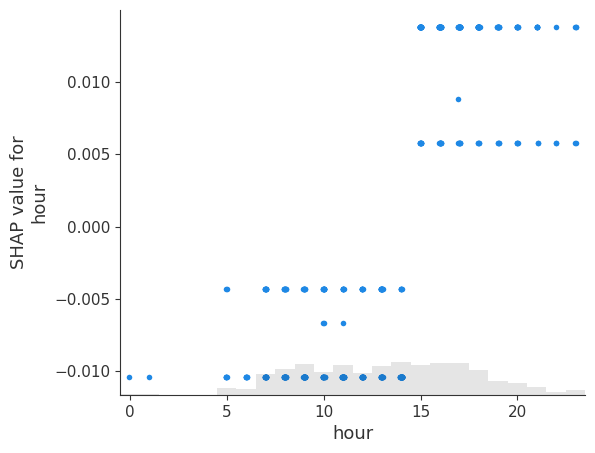

In [6]:
shap.plots.scatter(shap_whole_dataset_df[:, "hour"])


##### Individual Datapoint

video_duration  media_count  is_collab  \
id                                                            
3657906670172984648             NaN            7      False   

                     total_follower_reach  day_of_week  hour  \
id                                                             
3657906670172984648                  4204            2    19   

                     is_posted_by_dorfterror  added_location  \
id                                                             
3657906670172984648                     True           False   

                     number_of_characters_in_captions  \
id                                                      
3657906670172984648                               304   

                     number_of_words_in_caption  ...  \
id                                               ...   
3657906670172984648                          45  ...   

                     mean_post_count_of_coauthors  \
id                                                  
3657906670172984648                           NaN   

                     sum_post_count_of_coauthors  \
id                                                 
3657906670172984648                          NaN   

                     average_engagement_score_of_coauthors  \
id                                                           
3657906670172984648                                    NaN   

                     max_engagement_score_of_coauthors  \
id                                                       
3657906670172984648                                NaN   

                     min_engagement_score_of_coauthors  category_Bandalltag  \
id                                                                            
3657906670172984648                                NaN                  0.0   

                     category_Live_&_Tour  category_Merchandise  \
id                                                                
3657906670172984648                   1.0                   0.0   

                     category_Musik_&_Releases  \
id                                               
3657906670172984648                        0.0   

                     category_Politisches_Engagement  
id                                                    
3657906670172984648                              0.0  

[1 rows x 35 columns]

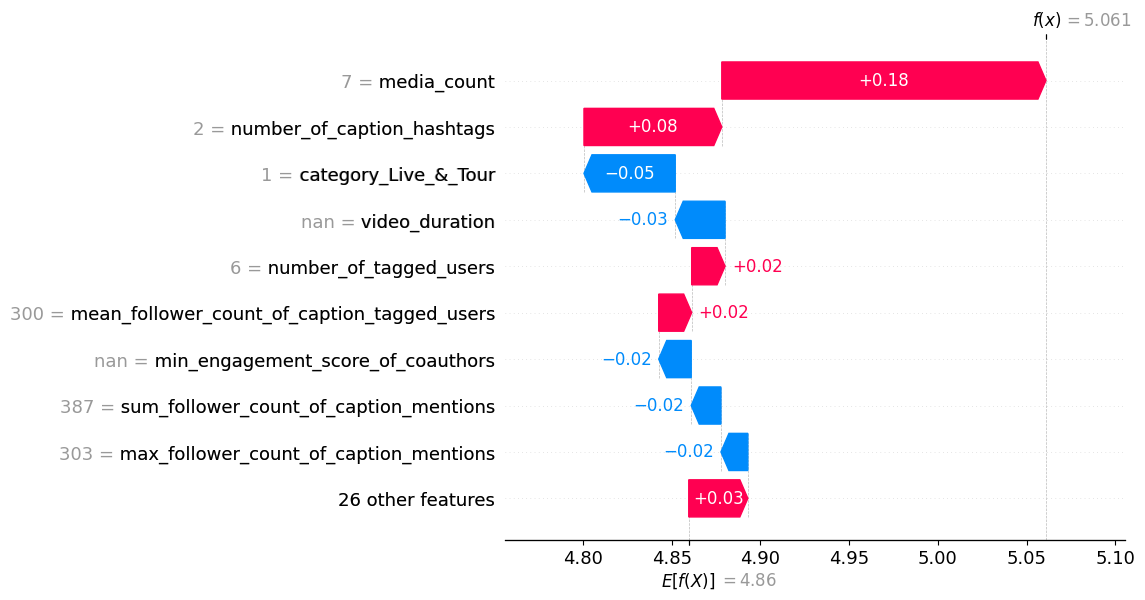

In [9]:
from utils import add_project_root_to_path, explain_prediction
import shap
import pandas as pd
add_project_root_to_path()
whole_dataset = pd.concat([dorfterror_whole_dataset_df_results_like_count['X_train'], dorfterror_whole_dataset_df_results_like_count['X_test']])
row_to_explain = whole_dataset[whole_dataset.index == "3657906670172984648"]
display(row_to_explain)

shap_values = explain_prediction(dorfterror_whole_dataset_df_results_like_count["final_model"], row_to_explain)

shap.plots.waterfall(shap_values[0])

## Trained with follower_like_ratio as target

### Trained on image posts

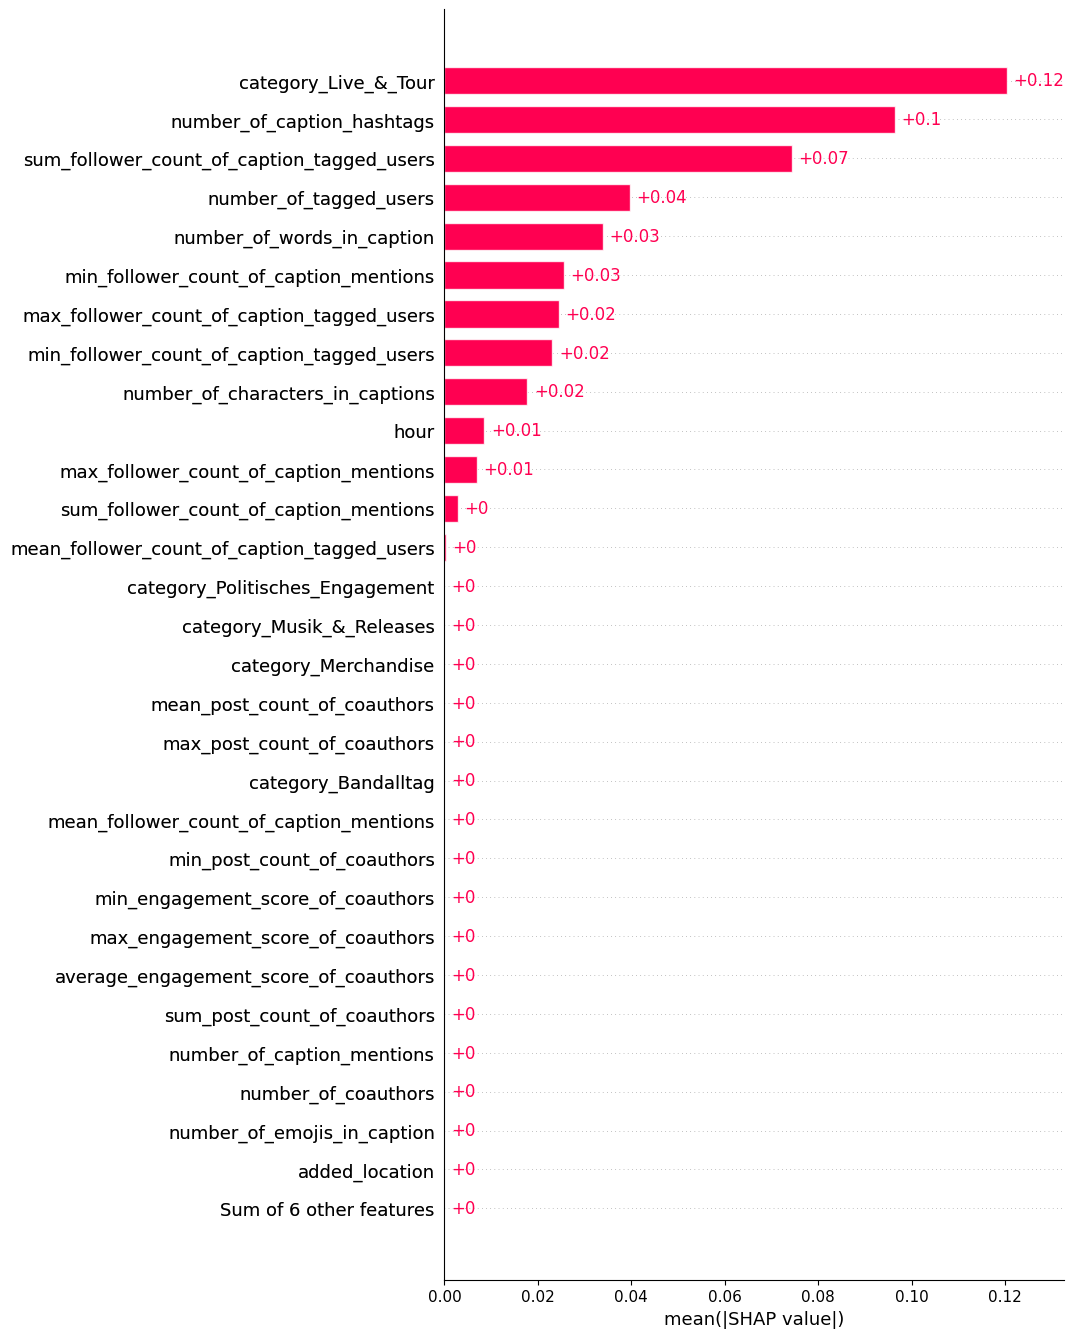

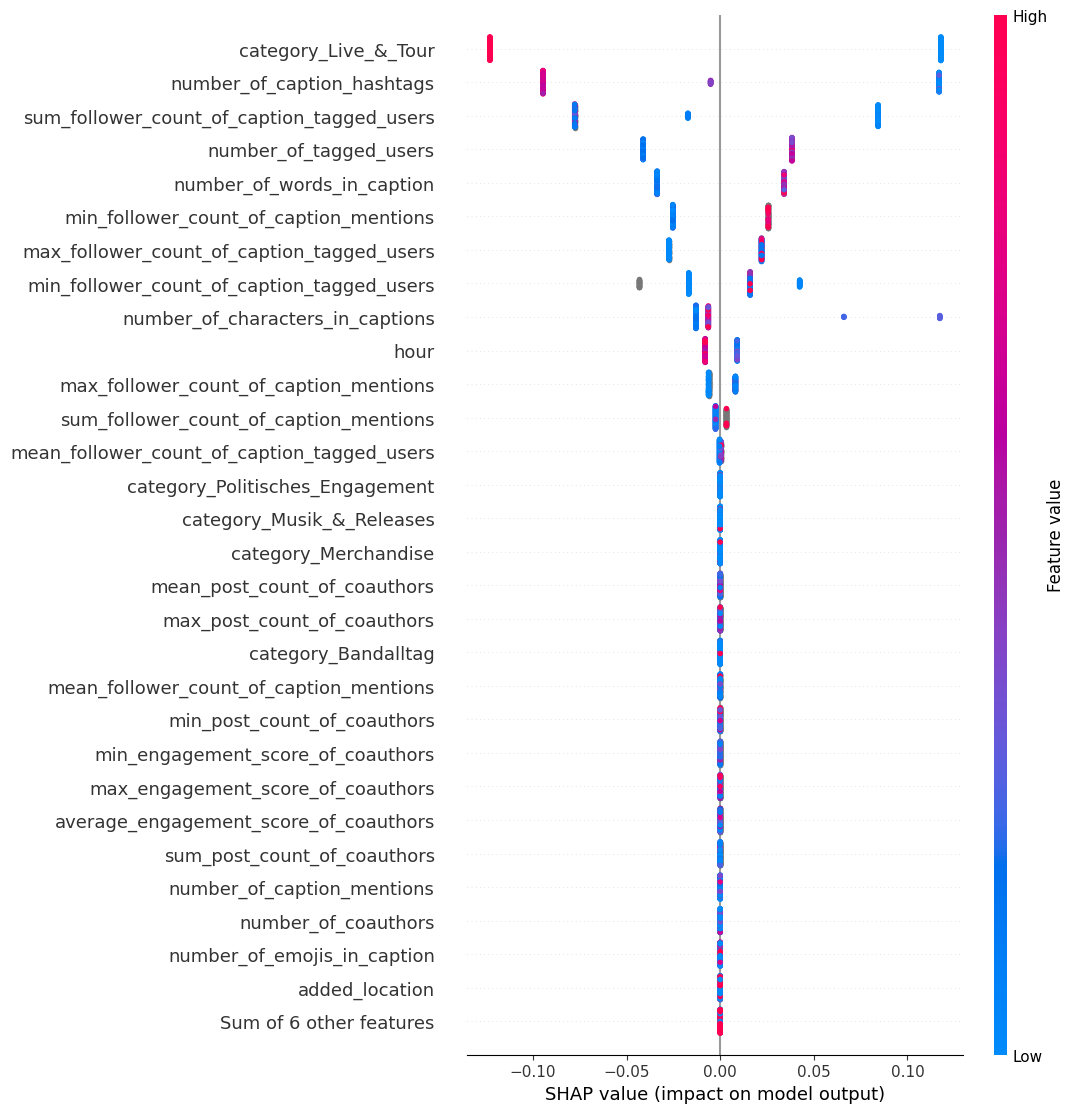

In [10]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_image_df_results_follower_like_ratio = load_results("insta_analytics_notebooks/model_training/dorfterror_image_df_results_follower_like_ratio")
shap_image_df = basic_shap_explainer(dorfterror_image_df_results_follower_like_ratio)

shap.plots.bar(shap_image_df, max_display=30)
shap.plots.beeswarm(shap_image_df, max_display=30)


### Trained on carousel posts

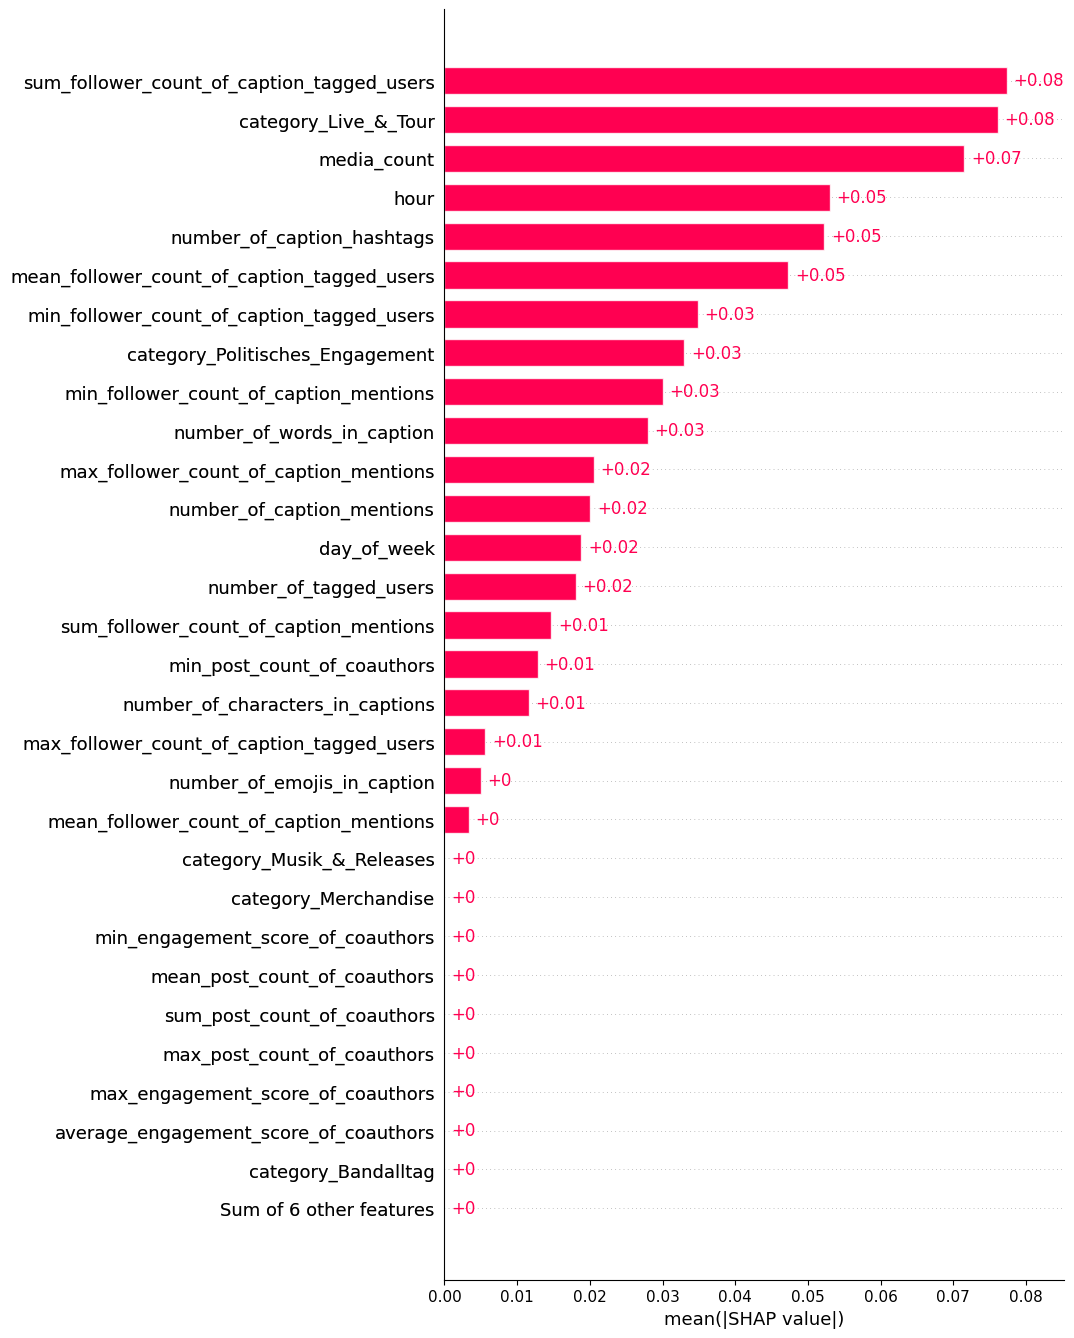

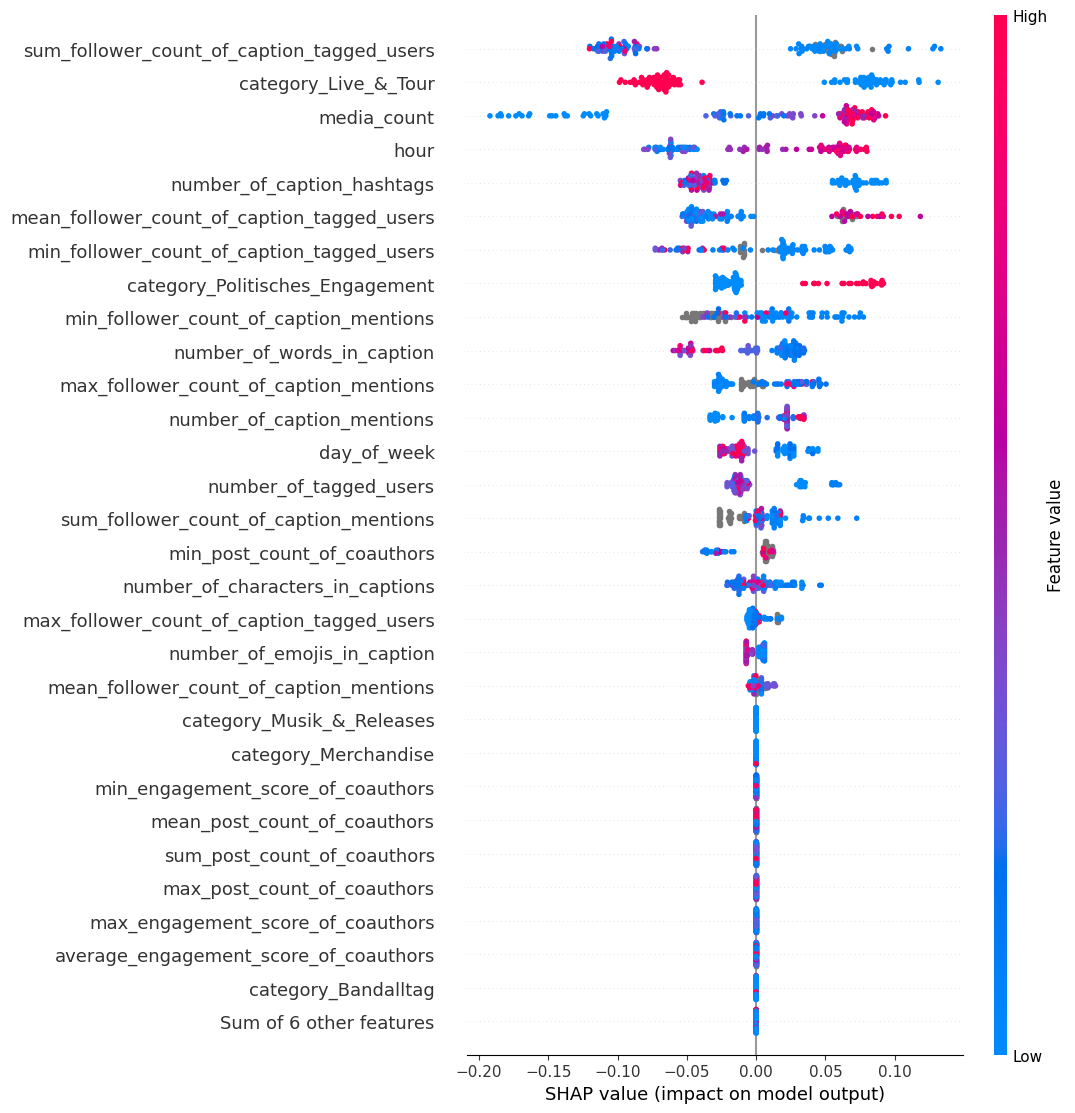

In [11]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_carousel_df_results_follower_like_ratio = load_results("insta_analytics_notebooks/model_training/dorfterror_carousel_df_results_follower_like_ratio")
shap_carousel_df = basic_shap_explainer(dorfterror_carousel_df_results_follower_like_ratio)

shap.plots.bar(shap_carousel_df, max_display=30)
shap.plots.beeswarm(shap_carousel_df, max_display=30)


### Trained on video posts

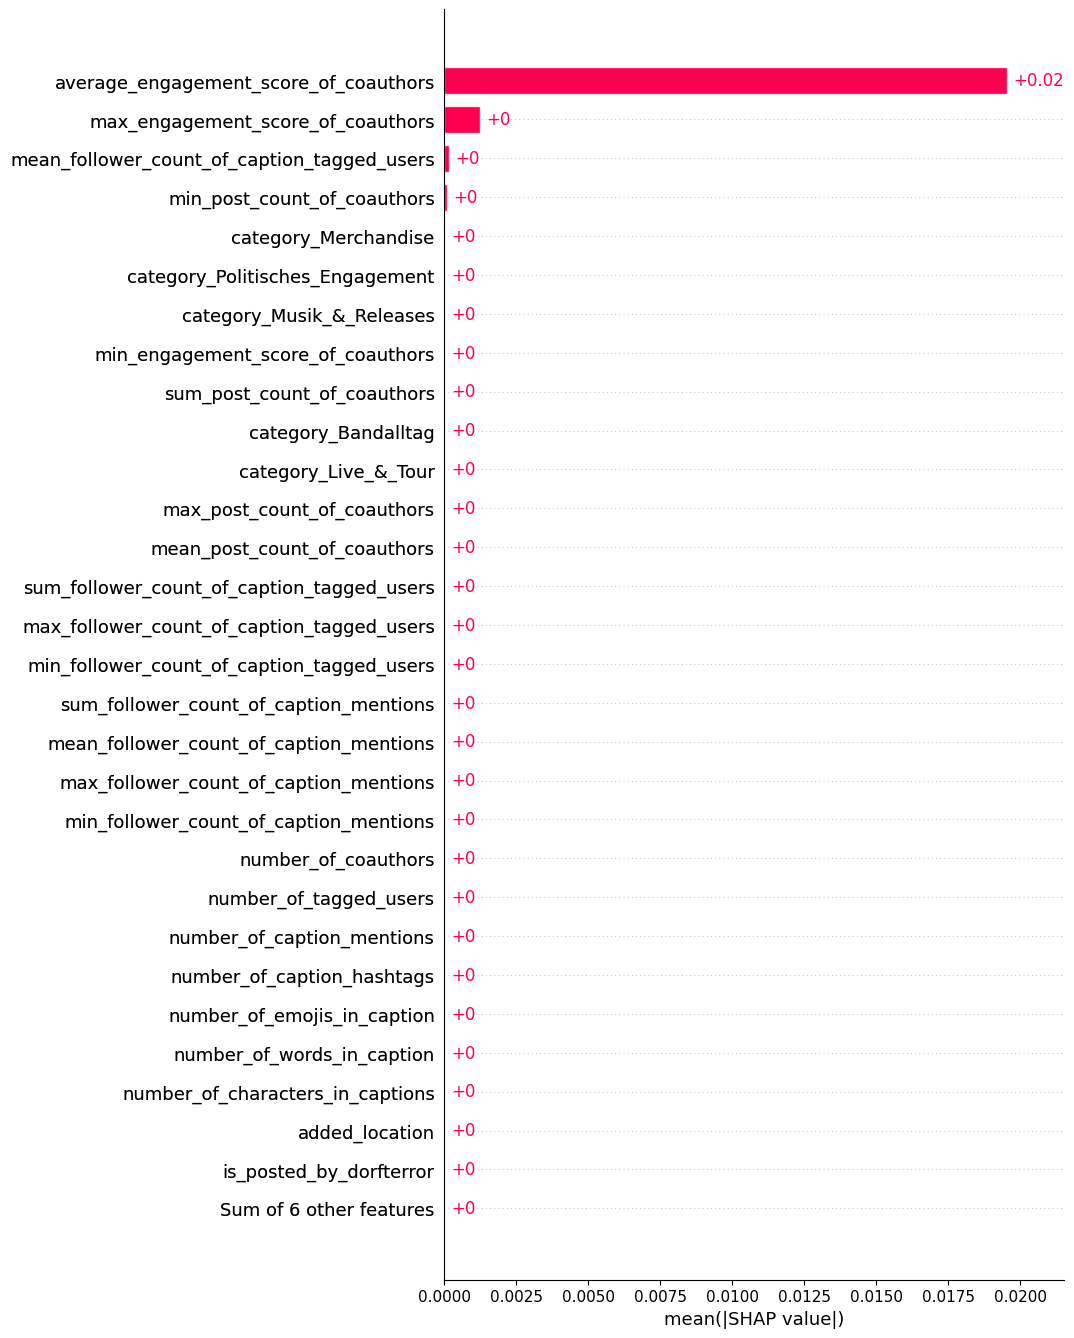

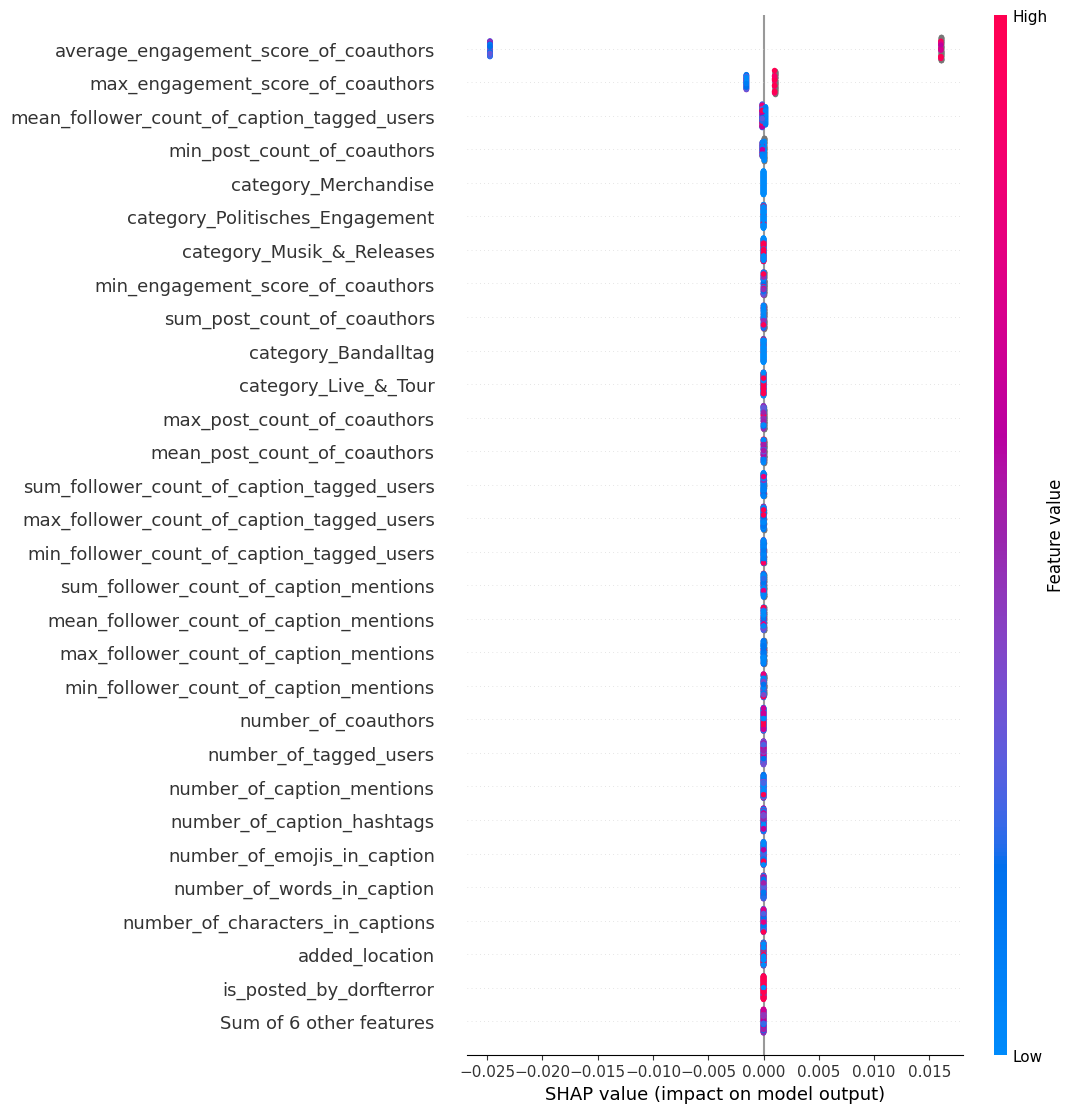

In [12]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
dorfterror_video_df_results_follower_like_ratio = load_results("insta_analytics_notebooks/model_training/dorfterror_video_df_results_follower_like_ratio")
shap_video_df = basic_shap_explainer(dorfterror_video_df_results_follower_like_ratio)

shap.plots.bar(shap_video_df, max_display=30)
shap.plots.beeswarm(shap_video_df, max_display=30)


### Trained on all posts

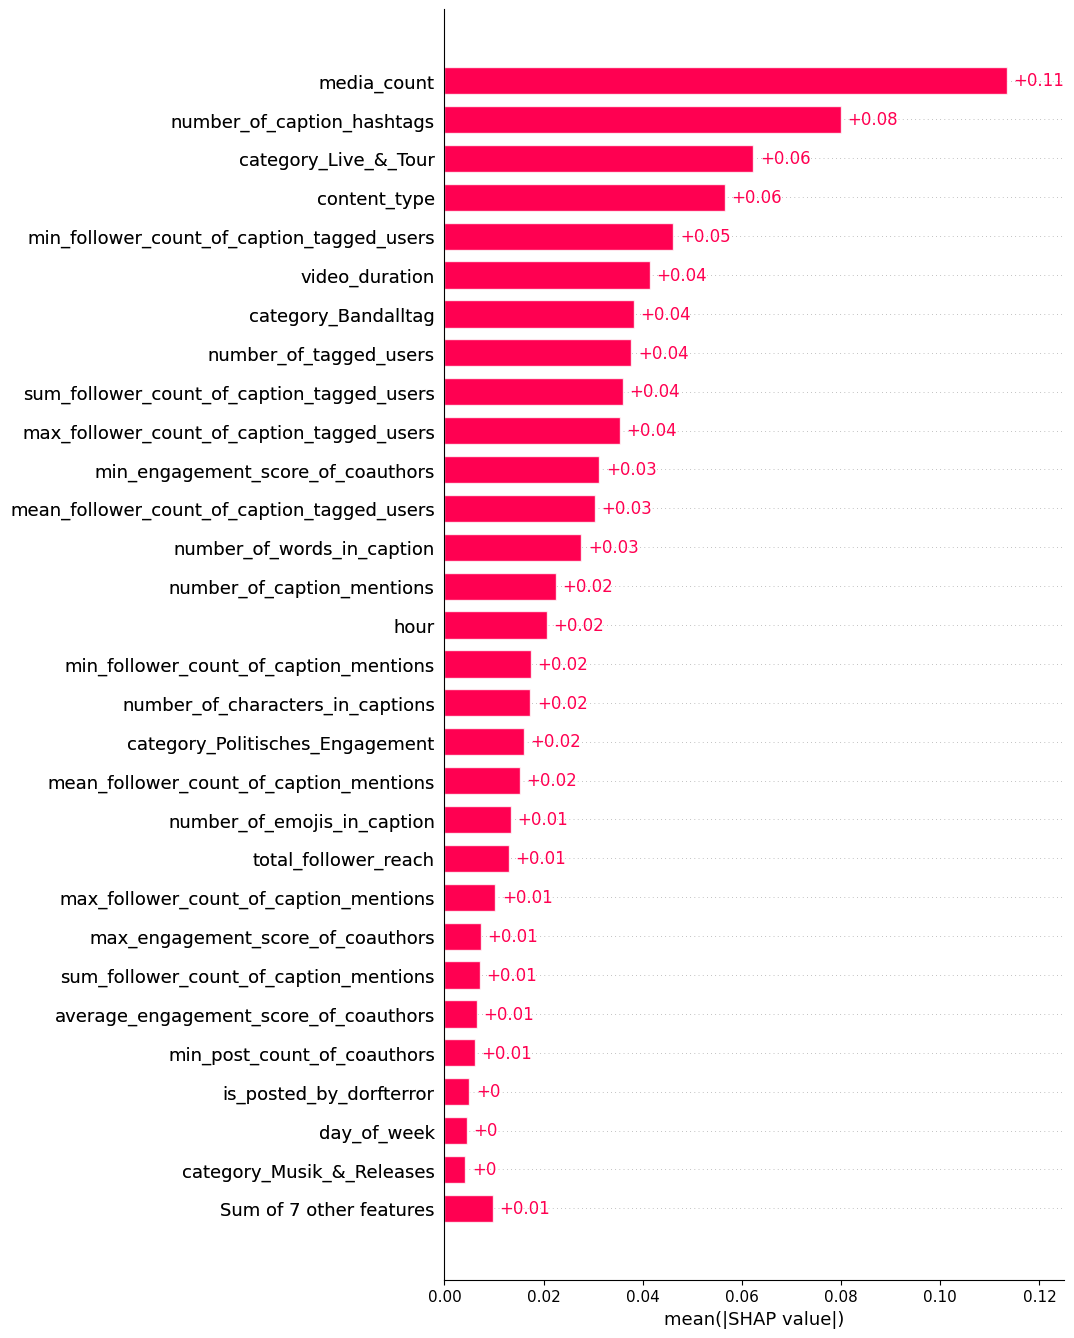

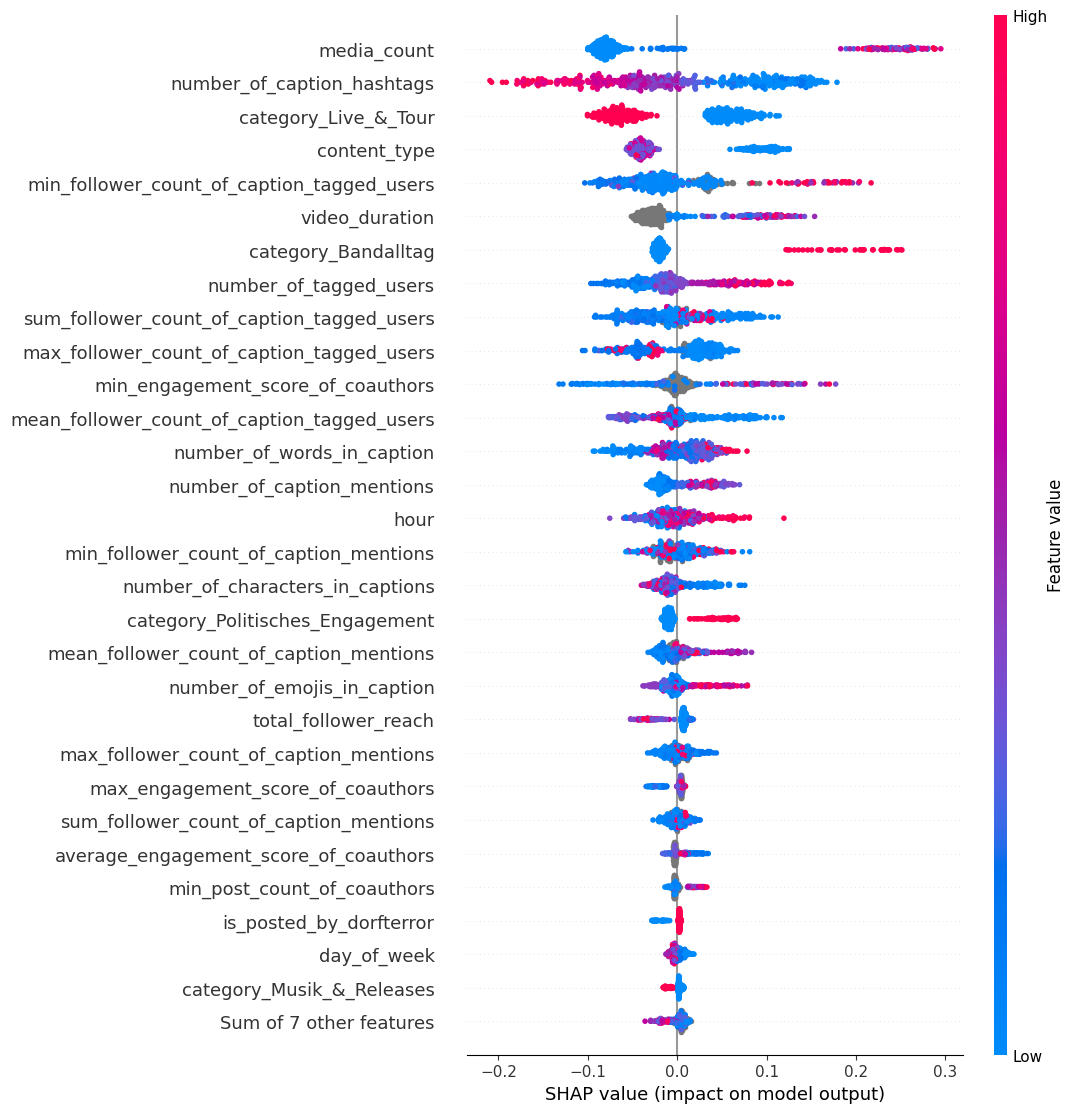

In [13]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer 
import shap
add_project_root_to_path()
dorfterror_whole_dataset_df_results_follower_like_ratio = load_results("insta_analytics_notebooks/model_training/dorfterror_whole_dataset_df_results_follower_like_ratio")
shap_whole_dataset_df = basic_shap_explainer(dorfterror_whole_dataset_df_results_follower_like_ratio)

shap.plots.bar(shap_whole_dataset_df, max_display=30)
shap.plots.beeswarm(shap_whole_dataset_df, max_display=30)


### Comparison

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def get_mean_abs_shap(shap_values, feature_names):
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    return pd.Series(mean_abs_shap, index=feature_names)


def plot_overlayed_shap_bars(shap_dict, feature_names, top_n=20):
    fig = go.Figure()
    
    colors = {
        'Image': 'rgba(31, 119, 180, 0.6)',
        'Carousel': 'rgba(255, 127, 14, 0.6)',
        'Video': 'rgba(44, 160, 44, 0.6)',
        'All': 'rgba(214, 39, 40, 0.6)',
    }

    shap_series = {}
    for key, shap_values in shap_dict.items():
        shap_series[key] = get_mean_abs_shap(shap_values, feature_names)
    
    mean_all = pd.concat(shap_series.values(), axis=1).mean(axis=1)
    top_features = mean_all.sort_values(ascending=False).head(top_n).index.tolist()
    
    for key, series in shap_series.items():
        values = series[top_features]
        fig.add_trace(go.Bar(
            x=values.values,
            y=top_features,
            orientation='h',
            name=key,
            marker_color=colors[key],
        ))

    fig.update_layout(
        title='Vergleich der wichtigsten SHAP-Features',
        barmode='overlay',
        xaxis_title='Mittlerer |SHAP-Wert|',
        yaxis_title='Feature',
        height=800,
    )
    
    fig.show()

shap_dict = {
    'Image': shap_image_df,
    'Carousel': shap_carousel_df,
    'Video': shap_video_df,
    'All': shap_whole_dataset_df,
}

feature_names = dorfterror_whole_dataset_df_results_follower_like_ratio['X_test'].columns

plot_overlayed_shap_bars(shap_dict, feature_names)


ValueError: Length of values (35) does not match length of index (36)

## Trained on bigger dataset with like_count as target

### Trained on image posts

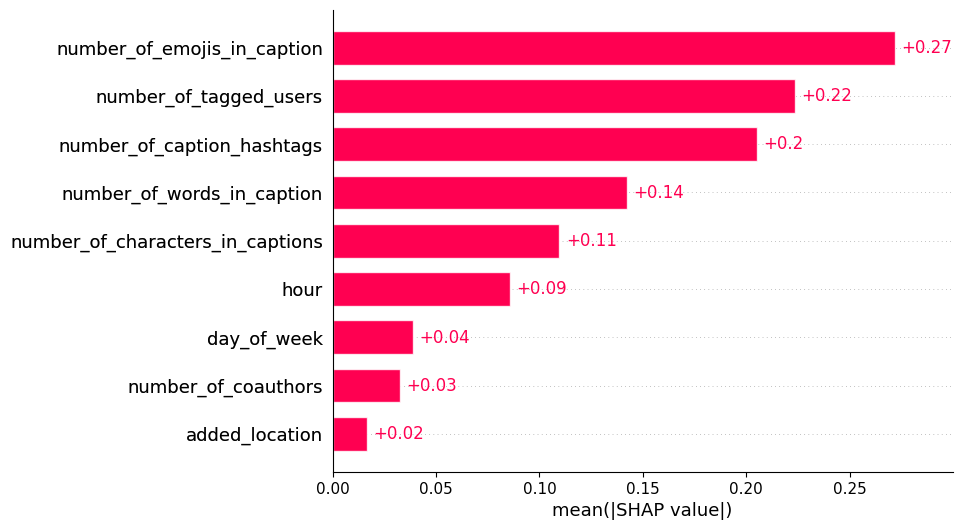

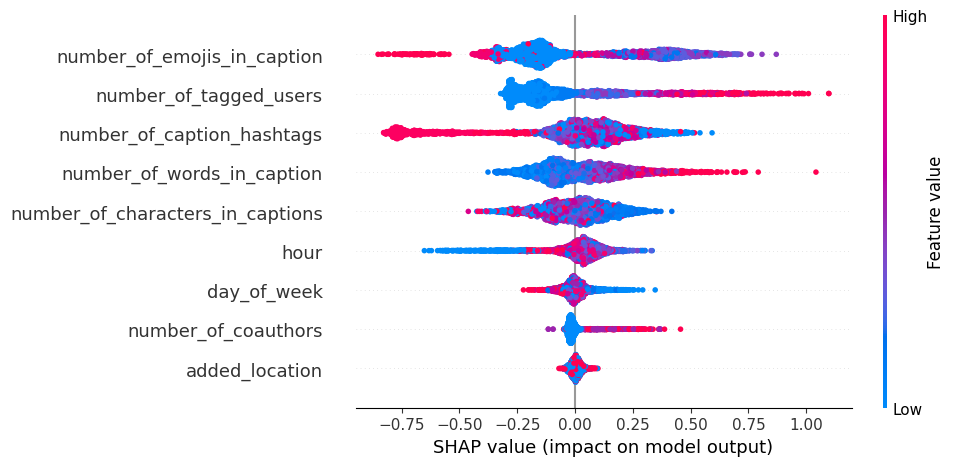

In [27]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
big_df_image_df_results_like_count = load_results("insta_analytics_notebooks/model_training/big_df_image_df_results_like_count")
big_df_shap_image_df = basic_shap_explainer(big_df_image_df_results_like_count)

shap.plots.bar(big_df_shap_image_df, max_display=30)
shap.plots.beeswarm(big_df_shap_image_df, max_display=30)


### Trained on carousel posts

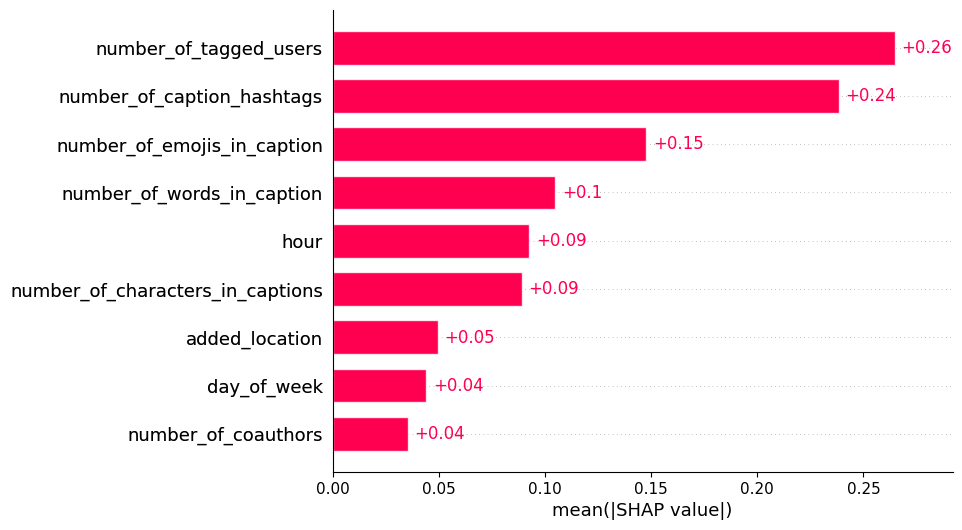

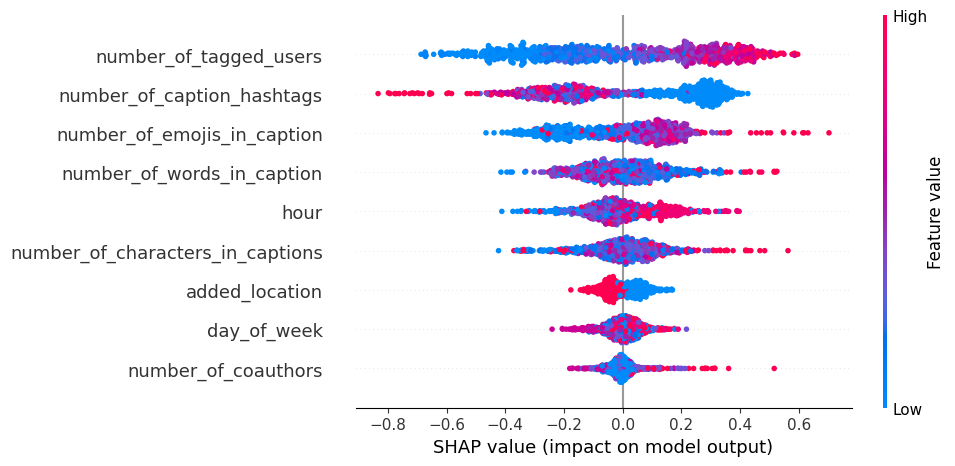

In [28]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
big_df_carousel_df_results_like_count = load_results("insta_analytics_notebooks/model_training/big_df_carousel_df_results_like_count")
big_df_shap_carousel_df = basic_shap_explainer(big_df_carousel_df_results_like_count)

shap.plots.bar(big_df_shap_carousel_df, max_display=30)
shap.plots.beeswarm(big_df_shap_carousel_df, max_display=30)


### Trained on video posts

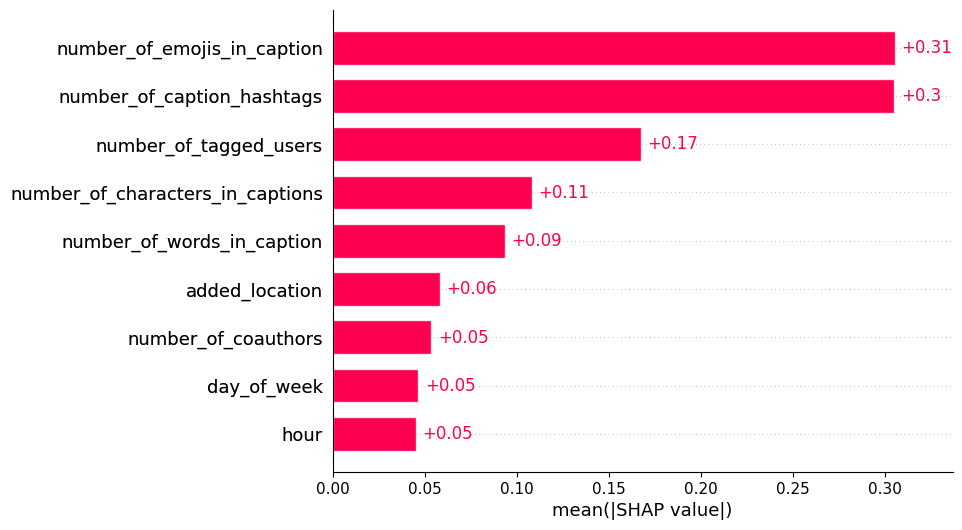

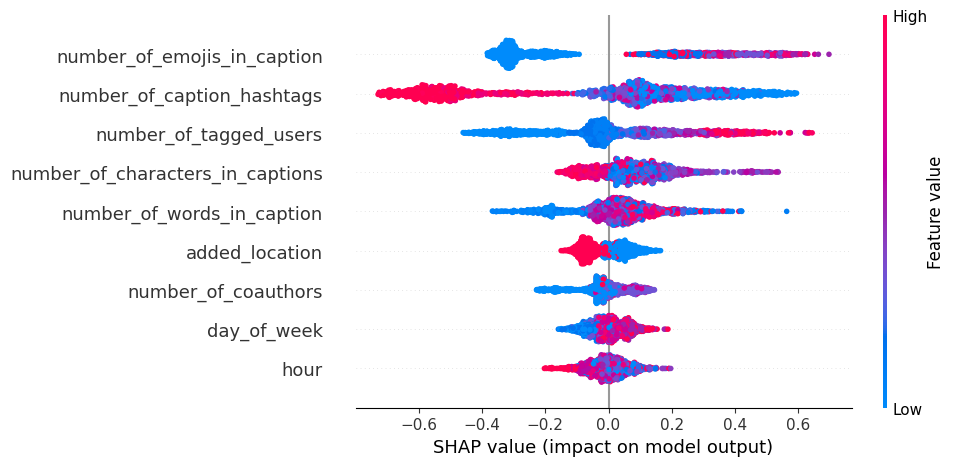

In [29]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
big_df_video_df_results_like_count = load_results("insta_analytics_notebooks/model_training/big_df_video_df_results_like_count")
big_df_shap_video_df = basic_shap_explainer(big_df_video_df_results_like_count)

shap.plots.bar(big_df_shap_video_df, max_display=30)
shap.plots.beeswarm(big_df_shap_video_df, max_display=30)


### Trained on all posts

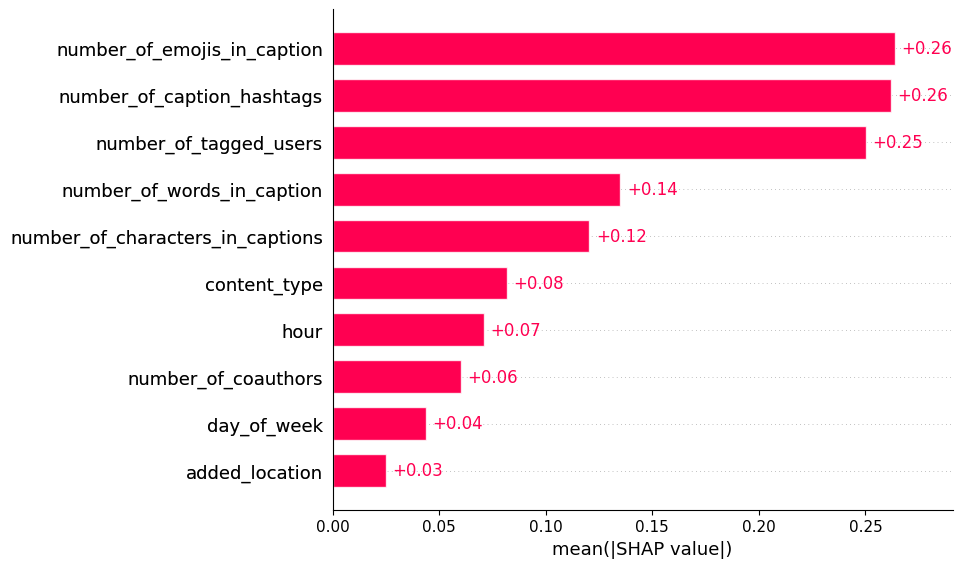

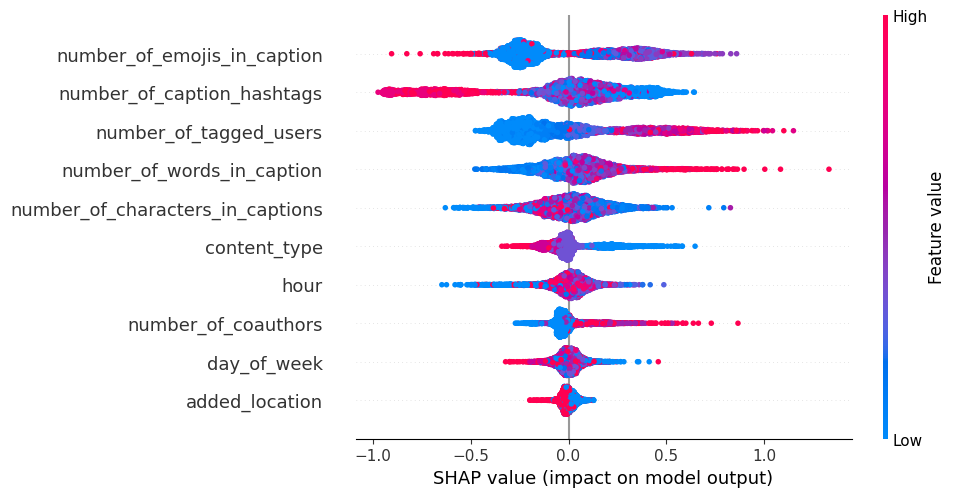

In [30]:
from utils import load_results, add_project_root_to_path, basic_shap_explainer
import shap
add_project_root_to_path()
big_df_whole_dataset_df_results_like_count = load_results("insta_analytics_notebooks/model_training/big_df_whole_dataset_df_results_like_count")
big_df_shap_whole_dataset_df = basic_shap_explainer(big_df_whole_dataset_df_results_like_count)

shap.plots.bar(big_df_shap_whole_dataset_df, max_display=30)
shap.plots.beeswarm(big_df_shap_whole_dataset_df, max_display=30)


### Comparison

In [36]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

def get_mean_abs_shap(shap_values, feature_names):
    mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
    return pd.Series(mean_abs_shap, index=feature_names)


def plot_overlayed_shap_bars(shap_dict, feature_names, top_n=20):
    fig = go.Figure()
    
    colors = {
        'Image': 'rgba(31, 119, 180, 0.6)',
        'Carousel': 'rgba(255, 127, 14, 0.6)',
        'Video': 'rgba(44, 160, 44, 0.6)',
        'All': 'rgba(214, 39, 40, 0.6)',
    }

    shap_series = {}
    for key, shap_values in shap_dict.items():
        if key != 'All':
            current_feature_names = feature_names.drop("content_type", errors="ignore")
        else:
            current_feature_names = feature_names
        shap_series[key] = get_mean_abs_shap(shap_values, current_feature_names)
    
    mean_all = pd.concat(shap_series.values(), axis=1).mean(axis=1)
    top_features = mean_all.sort_values(ascending=False).head(top_n).index.tolist()
    
    for key, series in shap_series.items():
        values = series[top_features]
        fig.add_trace(go.Bar(
            x=values.values,
            y=top_features,
            orientation='h',
            name=key,
            marker_color=colors[key],
        ))

    fig.update_layout(
        title='Vergleich der wichtigsten SHAP-Features',
        barmode='overlay',
        xaxis_title='Mittlerer |SHAP-Wert|',
        yaxis_title='Feature',
        height=800,
    )
    
    fig.show()

shap_dict = {
    'Image': big_df_shap_image_df,
    'Carousel': big_df_shap_carousel_df,
    'Video': big_df_shap_video_df,
    'All': big_df_shap_whole_dataset_df,
}

feature_names = big_df_image_df_results_like_count['X_train'].columns
print(feature_names)
plot_overlayed_shap_bars(shap_dict, feature_names)


Index(['day_of_week', 'hour', 'added_location',
       'number_of_characters_in_captions', 'number_of_words_in_caption',
       'number_of_emojis_in_caption', 'number_of_caption_hashtags',
       'number_of_tagged_users', 'number_of_coauthors'],
      dtype='object')


ValueError: Length of values (10) does not match length of index (9)